In [55]:
import pandas as pd
import seaborn as sns
import os

In [35]:
cdd_dic = []
for i in os.listdir('realrpsresults'):
    if 'count' in i:
        with open('realrpsresults/' + i) as f:
            for line in f:
                addlist = []
                count = int(line.strip().split(' ')[0])
                acc = line.strip().split(' ')[1]
                if count > 1 and acc not in addlist:
                    cdd_dic.append([i.replace('.count',''), acc, count])
                    addlist.append(acc)
cdd_df = pd.DataFrame(cdd_dic)

In [36]:
cdd_df.columns = ['sra','cdd','count']

In [42]:
cddmat = cdd_df.pivot_table(index='sra',columns='cdd',values='count').fillna(0)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cddmat)

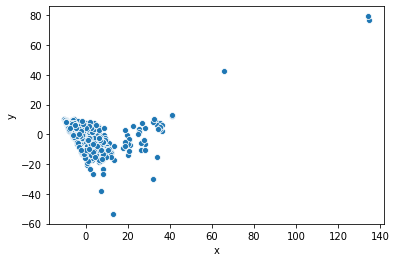

In [56]:
cdd_prin_df = pd.DataFrame(principalComponents)
cdd_prin_df.columns = ['x','y']
cdd_prin_df.index = cddmat.index
sns.scatterplot(cdd_prin_df['x'], cdd_prin_df['y'])

In [61]:
mash_dic = []
for i in os.listdir('mashresults'):
    if 'count' in i:
        with open('mashresults/' + i) as f:
            for line in f:
                addlist = []
                count = int(line.strip().split(' ')[0])
                acc = line.strip().split(' ')[1]
                if count > 1 and acc not in addlist:
                    mash_dic.append([i.replace('.sketchs',''), acc, count])
                    addlist.append(acc)
mash_df = pd.DataFrame(mash_dic)

In [63]:
mash_df.columns = ['sra','cdd','count']

In [64]:
mashmat = mash_df.pivot_table(index='sra',columns='cdd',values='count').fillna(0)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
mash_principalComponents = pca.fit_transform(mashmat)

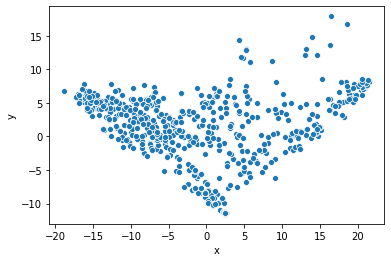

In [67]:
mash_prin_df = pd.DataFrame(mash_principalComponents)
mash_prin_df.columns = ['x','y']
mash_prin_df.index = mashmat.index
sns.scatterplot(mash_prin_df['x'], mash_prin_df['y'])

In [75]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

# Fitting Model
model.fit(mash_prin_df)
all_predictions = model.predict(mash_prin_df)
mash_prin_df['clus'] = all_predictions

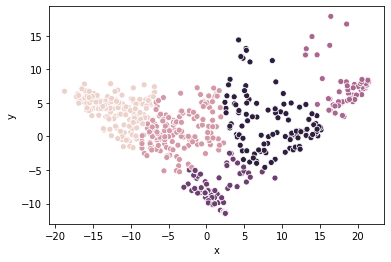

In [84]:
sns.scatterplot(mash_prin_df['x'], mash_prin_df['y'], hue=mash_prin_df['clus'], legend=None)

In [78]:
# Fitting Model
model.fit(cdd_prin_df)
all_predictions = model.predict(cdd_prin_df)
cdd_prin_df['clus'] = all_predictions

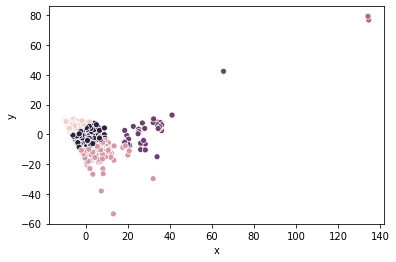

In [85]:
sns.scatterplot(cdd_prin_df['x'], cdd_prin_df['y'], hue=cdd_prin_df['clus'], legend=None)

In [102]:
cdd0 = list(cdd_prin_df[cdd_prin_df['clus'] == 0].index)
cdd1 = list(cdd_prin_df[cdd_prin_df['clus'] == 1].index)
cdd2 = list(cdd_prin_df[cdd_prin_df['clus'] == 2].index)
cdd3 = list(cdd_prin_df[cdd_prin_df['clus'] == 3].index)
cdd4 = list(cdd_prin_df[cdd_prin_df['clus'] == 4].index)
mas0 = list(mash_prin_df[mash_prin_df['clus'] == 0].index)
mas1 = list(mash_prin_df[mash_prin_df['clus'] == 1].index)
mas2 = list(mash_prin_df[mash_prin_df['clus'] == 2].index)
mas3 = list(mash_prin_df[mash_prin_df['clus'] == 3].index)
mas4 = list(mash_prin_df[mash_prin_df['clus'] == 4].index)
mas0nam = []
mas1nam = []
mas2nam = []
mas3nam = []
mas4nam = []
for i in mas0:
    mas0nam.append(i.replace(".sketch.counts",""))
for i in mas1:
    mas1nam.append(i.replace(".sketch.counts",""))
for i in mas2:
    mas2nam.append(i.replace(".sketch.counts",""))
for i in mas3:
    mas3nam.append(i.replace(".sketch.counts",""))
for i in mas4:
    mas4nam.append(i.replace(".sketch.counts",""))

In [114]:
len(list(set(cdd0) & set(mas3nam)))

158

In [122]:
len(list(set(cdd1) & set(mas0nam)))

112

17